In [1]:
using Revise
using Pkg

Pkg.add("PyPlot")

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/DistributionallyRobust.jl")
using .DistributionallyRobust

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


┌ Warning: The active manifest file at `/home/kang/DRC_Project/DRC_Trajectron/Manifest.toml` has an old format that is being maintained.
│ To update to the new format, which is supported by Julia versions ≥ 1.6.2, run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
│ To then record the julia version re-resolve with `Pkg.resolve()` and if there are resolve conflicts consider `Pkg.update()`.
└ @ Pkg.Types /cache/build/default-amdci4-2/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/manifest.jl:287
  No Changes

 to `~/DRC_Project/DRC_Trajectron/Project.toml`


  No Changes to `~/DRC_Project/DRC_Trajectron/Manifest.toml`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kang/DRC_Project/DRC_Trajectron/Manifest.toml:0


    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/8c86e48c0db1564a1d49548d3515ced5d604c408/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Info: Number of Julia Thread(s): 1
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3070 Laptop GPU
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:40


┌ Info: Python executable used by PyCall: /home/kang/anaconda3/envs/trajectron++/bin/python
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/DistributionallyRobust.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_drc_data_trajectron.jl");

epsilon = 0.1;
test_data_name = "hotel_test.pkl";                                                  # test data set name
test_scene_id = 0;                                                                  # test data id
start_time_idx = 401;                                                               # start time index in test data
ego_pos_init_vec = [-1.5, -8.5] .+ [-1.393743, 2.978962];                           # initial ego position [x, y] [m]
ego_pos_goal_vec = [3.5, 0.0]   .+ [-1.393743, 2.978962];                           # goal ego position [x, y] [m]
target_speed = 1.0;                                                                 # target speed [m/s]
sim_horizon = 10.0;                                                                 # simulation time horizon [s]
human_size = 0.4;
# ego_pos_goal_vec = [-1.5, -2];
# ego_pos_init_vec = [3.5, 5.0];

include("$(@__DIR__)/../scripts/parameter_setup_drc.jl");

In [33]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
    controller_setup(scene_param,
                    predictor_param,
                    prediction_device=prediction_device,
                    cost_param=cost_param,
                    cnt_param=cnt_param,
                    dtc=dtc,
                    ego_pos_init_vec=ego_pos_init_vec,
                    ego_pos_goal_vec=ego_pos_goal_vec,
                    target_speed=target_speed,
                    sim_horizon=sim_horizon,
                    verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false


Loaded evaluation data from /home/kang/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/hotel_test.pkl
Looking at the hotel_test.pkl sequence, data_id 0, start_idx 401
Loaded Trajectron model from /home/kang/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/pedestrians/models/hotel_attention_radius_3/model_registrar-100.pt


/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `val

In [34]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan);

┌ Warning: Time 0.10 [sec]: DRC computation took 0.152 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.10 [sec]: This evaluation iteration took 0.152 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.30 [sec]: DRC computation took 0.136 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.30 [sec]: This evaluation iteration took 0.137 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.315 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.50 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.50 [sec]: This evaluation iteration took 0.102 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.60 [sec]: DRC computation took 0.12 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.60 [sec]: This evaluation iteration took 0.12 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.70 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.70 [sec]: This evaluation iteration took 0.101 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 0.80 [sec]: DRC computation took 0.103 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.366 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.00 [sec]: DRC computation took 0.11 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.00 [sec]: This evaluation iteration took 0.11 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.20 [sec]: DRC computation took 0.116 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.376 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.50 [sec]: DRC computation took 0.106 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.50 [sec]: This evaluation iteration took 0.107 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.326 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 1.90 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 1.90 [sec]: This evaluation iteration took 0.102 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.352 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.10 [sec]: DRC computation took 0.115 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.10 [sec]: This evaluation iteration took 0.115 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.40 [sec]: DRC computation took 0.112 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.40 [sec]: This evaluation iteration took 0.372 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.60 [sec]: DRC computation took 0.11 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.60 [sec]: This evaluation iteration took 0.11 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 2.80 [sec]: DRC computation took 0.102 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.361 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.00 [sec]: DRC computation took 0.108 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.00 [sec]: This evaluation iteration took 0.108 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.352 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.30 [sec]: DRC computation took 0.114 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.30 [sec]: This evaluation iteration took 0.114 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.40 [sec]: DRC computation took 0.103 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.40 [sec]: This evaluation iteration took 0.103 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.50 [sec]: DRC computation took 0.113 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.50 [sec]: This evaluation iteration took 0.114 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.60 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.361 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.70 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377
┌ Warning: Time 3.70 [sec]: DRC computation took 0.113 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.70 [sec]: This evaluation iteration took 0.113 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 3.80 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377


┌ Warning: Time 3.90 [sec]: DRC computation took 0.108 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 3.90 [sec]: This evaluation iteration took 0.108 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.00 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377


┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.352 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226
┌ Warning: Time 4.10 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377


┌ Warning: Time 4.20 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377
┌ Warning: Time 4.20 [sec]: DRC computation took 0.106 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.20 [sec]: This evaluation iteration took 0.106 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.30 [sec]: All samples violate CVaR constraints.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:377
┌ Warning: Time 4.30 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.30 [sec]: This evaluation iteration took 0.101 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.40 [sec]: DRC computation took 0.111 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.377 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.50 [sec]: DRC computation took 0.101 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.50 [sec]: This evaluation iteration took 0.101 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.60 [sec]: DRC computation took 0.121 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.60 [sec]: This evaluation iteration took 0.121 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.70 [sec]: DRC computation took 0.103 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.70 [sec]: This evaluation iteration took 0.104 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.362 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 4.90 [sec]: DRC computation took 0.11 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 4.90 [sec]: This evaluation iteration took 0.11 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.10 [sec]: DRC computation took 0.109 [sec], which exceeds the maximum computation time allowed.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/distributionally_robust_controller.jl:254
┌ Warning: Time 5.10 [sec]: This evaluation iteration took 0.109 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.279 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.228 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.236 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.237 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.199 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.205 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.187 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.193 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.209 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.203 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kang/anaconda3/envs/trajectron++/lib/python3.6/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `val

┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.239 [sec], which exceeds dtc.
└ @ Main.DistributionallyRobust /home/kang/DRC_Project/DRC_Trajectron/src/drc_evaluation.jl:226


In [35]:
# display_log(result.log)

In [36]:
result.total_cnt_cost

1.1229851546442347

In [37]:
result.total_pos_cost

153.71083974565693

In [38]:
result.total_col_cost

7.416293493017168

In [39]:
result.total_col

0

In [40]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

162.25011839331833

In [41]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.9427471654748772

In [42]:
# make_gif(result, dtplot=0.1, fps=5, xlim=(-3. + -5.263534, 13. + -5.314636), 
#          ylim=(-2. + -5.263534, 12. + -5.314636), figsize=(600, 400), 
#          legendfontsize=7, legend=:bottomright, markersize=5., filename="9_data_trajectron_drc.gif")

In [43]:
using Plots

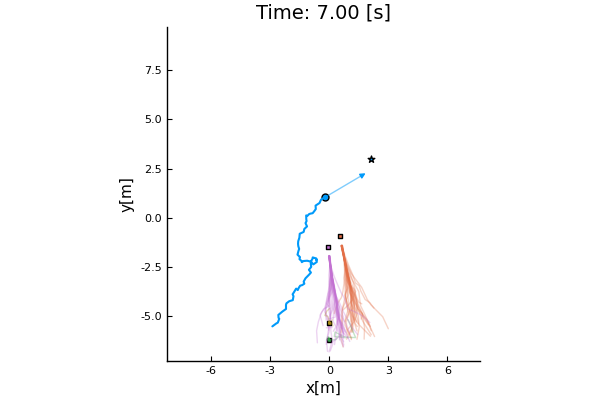

In [55]:
ii = 71;
color_dict = Dict();
w = result.w_history[ii];

k = ii;
prediction_dict = result.prediction_dict_history[k];

while isnothing(prediction_dict)
    k -= 1;
    prediction_dict = result.prediction_dict_history[k];
    if isnothing(prediction_dict)
        print("nothing")
    else
        print(prediction_dict)
    end
end

show_nominal_trajectory = false

if show_nominal_trajectory
    nominal_trajectory = result.nominal_trajectory_history[ii]
else
    nominal_trajectory = nothing
end

figsize=(600, 400);
legendfontsize=7; 
legend=:none; 
markersize=5.;
xlim=(-3. + -5.263534, 13. + -5.314636);
ylim=(-2. + -5.263534, 12. + -2.314636);
show_prediction=true;
dummy_pos = nothing

plt = visualize!(color_dict, w,
                result.target_trajectory_history[ii],
                prediction_dict,
                result.sim_param.num_samples,
                # u_nominal_idx,
                # nominal_trajectory,
                figsize, legend,
                legendfontsize,
                xlim, ylim, markersize,
                true,
                show_prediction,
                dummy_pos)

show_past_ego_trajectory = true

if show_past_ego_trajectory
    ego_traj_x = [get_position(w.e_state)[1] for w in result.w_history[1:ii]]
    ego_traj_y = [get_position(w.e_state)[2] for w in result.w_history[1:ii]]
    ego_color = color_dict["Ego Robot"];
    plot!(ego_traj_x, ego_traj_y, color=ego_color, linewidth=1.5, label="Ego Trajectory")
end

In [56]:
savefig(plt, "DRC_hotel_7.pdf")